<a href="https://colab.research.google.com/github/dikshantranjan9827/CustomerSegmentation/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name:-Customer Segmentation using K-Means Clustering

BY:-Dikshant Ranjan

***Objective:-***

The objective of this project is to segment customers into meaningful groups based on their annual income and spending behavior. By clustering customers, businesses can better understand consumer behavior and adopt targeted marketing strategies, loyalty programs, and product design.

Importing important dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

***Dataset***

Source: Kaggle – Mall Customer Segmentation Data (Mall_Customers.csv)

In [ ]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


***Data Preprocessing***

Checked for missing values: none found.

Selected relevant features for clustering:

-Annual Income

-Spending Score

In [ ]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [ ]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Choosing the Annual Income Column & Spending Score column

In [ ]:
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

***Clustering Model***

**Algorithm Used:** K-Means Clustering

 It is well-suited for partitioning datasets into a fixed number of clusters based on similarity.

**Steps Taken:**

Applied the Elbow Method to determine the optimal number of clusters.

Found that 5 clusters gave a good balance between inertia (WCSS) and complexity.

Implemented K-Means with 5 clusters.

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

**Elbow Method Plot:** Showed a noticeable 'elbow' at 5 clusters.

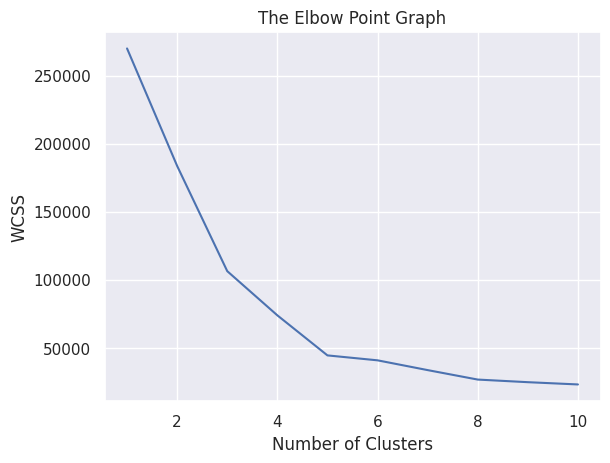

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters -  0, 1, 2, 3, 4

In [ ]:
customer_data['Cluster'] = Y

Pair Plot: Clear separation of groups showing distinct income and spending patterns.

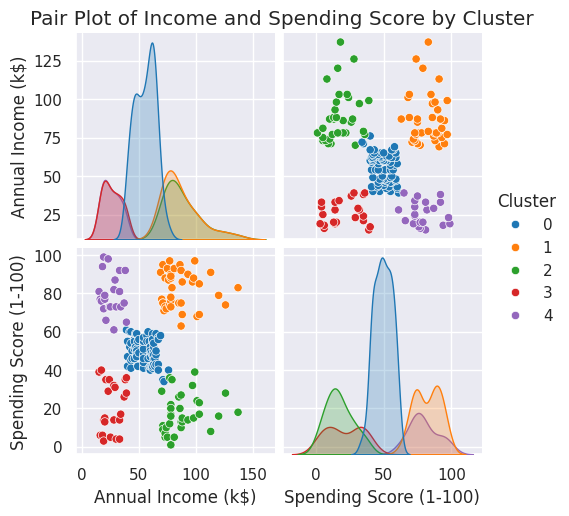

In [ ]:
sns.pairplot(customer_data, vars=['Annual Income (k$)', 'Spending Score (1-100)'], hue='Cluster', palette='tab10')
plt.suptitle('Pair Plot of Income and Spending Score by Cluster', y=1.02)
plt.show()

**Count Plot by Gender:** Showed gender distribution within each cluster.

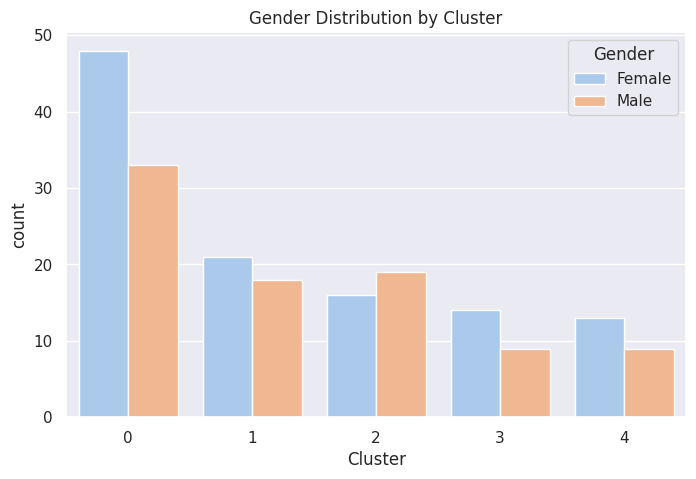

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', hue='Gender', data=customer_data, palette='pastel')
plt.title('Gender Distribution by Cluster')
plt.show()

**Box Plot of Age:** Revealed how different age groups are distributed across clusters.

/tmp/ipython-input-2470946480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=customer_data, palette='Set2')


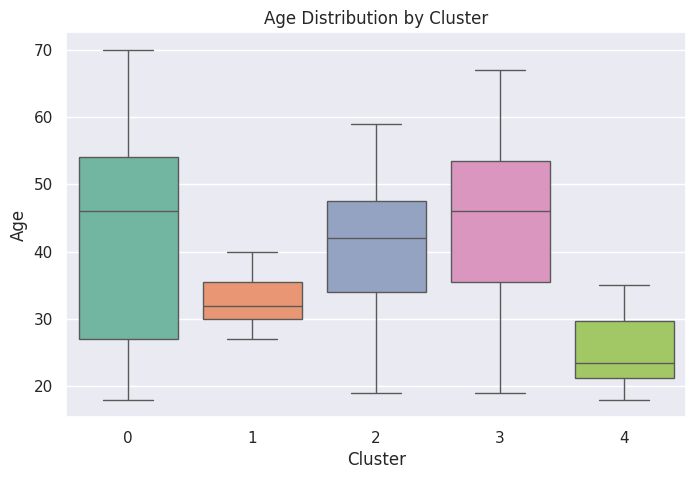

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Age', data=customer_data, palette='Set2')
plt.title('Age Distribution by Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(14,5))

<Figure size 1400x500 with 0 Axes>

<Figure size 1400x500 with 0 Axes>

**Histograms:** Helped visualize the income and spending score distributions across all customers.

Text(0.5, 1.0, 'Annual Income Distribution')

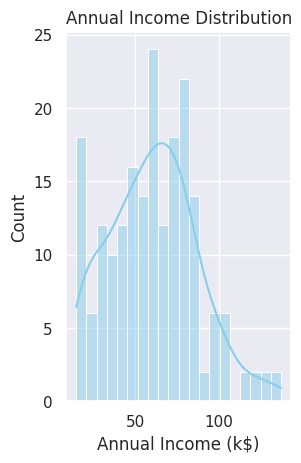

In [ ]:
plt.subplot(1,2,1)
sns.histplot(customer_data['Annual Income (k$)'], bins=20, kde=True, color='skyblue')
plt.title('Annual Income Distribution')

**Cluster Visualization:** Plotted income vs. spending score, with 5 clusters highlighted along with centroids.

Text(0.5, 1.0, 'Spending Score Distribution')

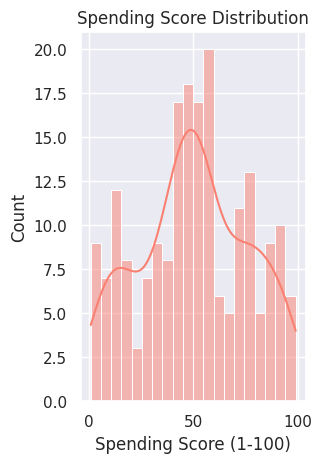

In [ ]:
plt.subplot(1,2,2)
sns.histplot(customer_data['Spending Score (1-100)'], bins=20, kde=True, color='salmon')
plt.title('Spending Score Distribution')

In [ ]:
plt.show()

***Results & Cluster Characteristics***

**Cluster 1 (High Income, Low Spending):**
Customers with high annual income but low spending score. Possibly cautious or less engaged shoppers.

**Cluster 2 (Average Income, Average Spending):**
Middle-income group with moderate spending. Balanced behavior, typical average customers.

**Cluster 3(Low Income,Low Spending):**
Budget-conscious customers with minimal spending.

**Cluster 4 (High Income, High Spending):**
Premium customer group with high income and high spending score. Most valuable segment for targeted advertising and premium services.

**Cluster 5 (Low Income, High Spending):**
Customers with lower income but higher spending. Could be younger demographics (students, early professionals) showing enthusiastic shopping habits.

Visualizing all the Clusters

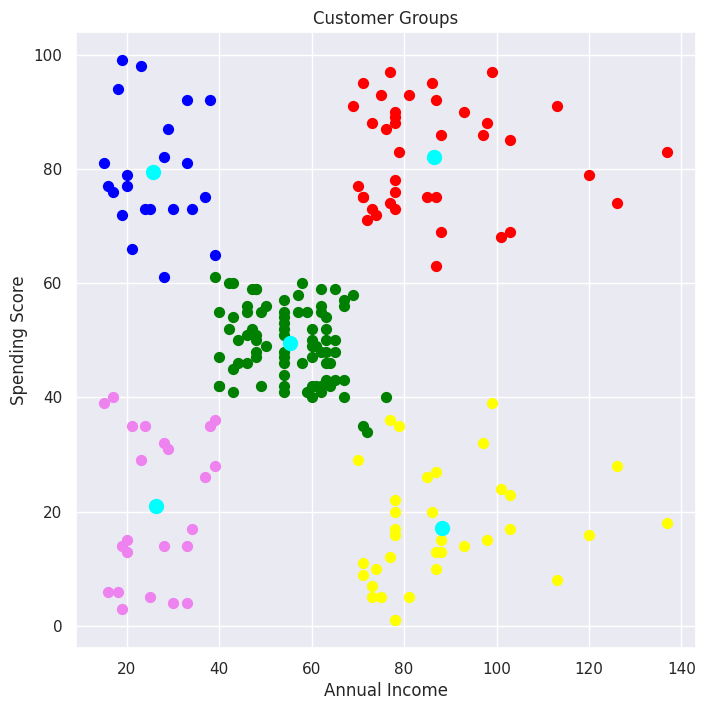

In [ ]:
# Visualize the clusters and their centroids
plt.figure(figsize=(8, 8))
colors = ['green', 'red', 'yellow', 'violet', 'blue']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

for i in range(5):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, c=colors[i], label=labels[i])

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***Conclusion***

The K-Means clustering model successfully divided mall customers into five segments with distinct income and spending behaviors.

Businesses can leverage these insights to customize marketing approaches

Targeting Cluster 4 with luxury products and premium services.

Encouraging Cluster 1 to spend more using loyalty programs or exclusive offers.

Designing budget-oriented offers for Cluster 3.

Monitoring Cluster 5 as potential future high-value customers.